# Descrição do projeto 

Você trabalha para a loja online Ice, que vende videogames no mundo todo. As avaliações de usuários e especialistas, gêneros, plataformas (por exemplo, Xbox ou PlayStation) e dados históricos sobre vendas de jogos estão disponíveis em fontes abertas. Você precisa identificar padrões que determinam se um jogo tem sucesso ou não. Isso vai permitir que você identifique possíveis sucessos e planeje campanhas publicitárias.

Os dados disponibilizados remontam a 2016. Vamos imaginar que estamos em dezembro de 2016 e você está planejando uma campanha para 2017.

O importante é ganhar experiência trabalhando com dados. Não importa se você está prevendo as vendas de 2017 com base nos dados de 2016 ou as vendas de 2027 com base nos dados de 2026.

O conjunto de dados contém uma coluna de "rating" (classificação) que armazena a classificação ESRB de cada jogo. O Entertainment Software Rating Board avalia o conteúdo de um jogo e atribui uma classificação etária, como Teen (Adolescente) ou Mature (Adulto).

### Etapa 1. Abra o arquivo de dados e estude as informações gerais

In [62]:
#importa todas as bibliotecas que serão utilizadas

import pandas as pd
from scipy import stats as st 
from math import factorial 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns

In [63]:
# Lê o arquivo
df_ice = pd.read_csv('games.csv')
df_ice.head()


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Etapa 2. Prepare os dados


In [64]:
# Deixa o nome das colunas com letras minúsculas

df_ice.columns = df_ice.columns.str.lower()
df_ice.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [65]:
# Verifica o type de cada coluna 
df_ice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [66]:
# Converte a coluna 'user_score' para o type correto 
df_ice['user_score'] = pd.to_numeric(df_ice['user_score'], errors='coerce')
df_ice.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


A única colunca na qual houve modificação de object para float foi a 'user_score', uma vez que esta coluna carrega informações numéricas de pontuação.

#### Trabalhando com valores ausentes

In [67]:
# Verifica quantos valores ausentes existem em cada coluna
df_ice.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [68]:
# identificando os anos de lançamento ques estão ausentes
df_year_of_release = df_ice[df_ice['year_of_release'].isnull()][['platform','name','year_of_release']]
df_year_of_release

,platform,name,year_of_release
183,PS2,Madden NFL 2004,NaN
377,PS2,FIFA Soccer 2004,NaN
456,Wii,LEGO Batman: The Videogame,NaN
475,PS2,wwe Smackdown vs. Raw 2006,NaN
609,2600,Space Invaders,NaN
...,...,...,...
16373,PSP,PDC World Championship Darts 2008,NaN
16405,GC,Freaky Flyers,NaN
16448,PC,Inversion,NaN
16458,PS3,Hakuouki: Shinsengumi Kitan,NaN


In [69]:
# Itera sobre as linhas com year_of_release ausente
# idx: o índice da linha no df original
# row: linha completa
#.isnull(): filtro booleano. Treu = ausente, False = onde está preenchido 
#.iterrows() percorre linha por linha 

for idx, row in df_ice[df_ice['year_of_release'].isnull()].iterrows(): 
    nan_name = row['name'] 
    
    # Busca todos os anos conhecidos para esse nome
    #.notnull() verifica quais linhas têm o ano de lançamento preenchido
    anos_possiveis = df_ice[(df_ice['name'] == nan_name) & (df_ice['year_of_release'].notnull())]['year_of_release']


    # .mode() retorna os valores mais frequentes da série
    # .iloc[0] pega o primeiro da lista, caso haja empate
    if not anos_possiveis.empty:
        # Substitui pelo ano mais comum (ou o primeiro, se preferir)
        df_ice.at[idx, 'year_of_release'] = anos_possiveis.mode().iloc[0]

In [70]:
# Substitui valores ausentes da coluna 'rating' pora 'Unknown'  
df_ice['rating'] = df_ice['rating'].fillna('Unknown') 

#Alterando os valores ausentes de year_of_release para 0
df_ice['year_of_release'] = df_ice['year_of_release'].fillna(0) 

# Exclui os valores ausentes da coluna ['name']
df_ice = df_ice.dropna(subset=['name'])

# Verifica se está tudo ok
df_ice.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating                0
dtype: int64

-Os valores ausentes da coluna 'rating' foram substituidos para 'Unknow', uma vez que essa é uma coluna do tipo 'object'. 

**Para os valores ausentes da coluna 'year_of_release':**
- Identificamos o ano de lançamento do jogo em outras plataformas e substituimos o valor ausente por ele.
- Ainda assim sobraram 146 valores ausentes que foram substitídos por zero. Em uma análise na vida real, poderíamos perguntar ao time se era possível excluir essa pequena fatia de valores ausentes, uma vez que não há registros em outras plataformas.

-Excluímos os valores ausentes da coluna 'name' já que haviam só dois nomes ausentes. Como não conseguimos identificar o jogo, não faz sentido manter esses dados. 

-As colunas 'critic_score' e 'user_score' permaneceram com valores ausentes. Substituí-los por 'tbd' não é adequado, pois introduzir uma string em colunas do tipo float pode corromper os dados. Utilizar o valor 0 também não é recomendável, já que isso poderia distorcer as análises, levando à interpretação equivocada de que o jogo recebeu uma avaliação muito baixa, quando na verdade o dado está apenas ausente.


In [71]:
# Observando dados importantes
df_ice.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,8137.000000,7590.000000
mean,1988.962125,0.263302,0.145045,0.077625,0.047343,68.967679,7.125046
std,186.812588,0.813565,0.503359,0.308871,0.186742,13.938165,1.500006
min,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


A partir do desvio padrão, observamos que as vendas no Japão são mais previsíveis do que na América do Norte e na Europa.
Também identificamos que o jogo mais recente foi lançado em 2016.
Quanto às avaliações, a média de user_score é de 7,12, enquanto a de critic_score é de 68,96.
Além disso, verificamos que nenhum jogo recebeu 100% de aprovação em nenhuma das métricas.

### Calcule o total de vendas (a soma das vendas em todas as regiões) para cada jogo e coloque esses valores em uma coluna separada.

In [72]:
# Calcula o total de vendas para cada região 
total_na_sales = df_ice['na_sales'].sum()
print(f'O total das vendas na América do Norte é: ', total_na_sales)

total_eu_sales = df_ice['eu_sales'].sum()
print(f'O total das vendas na Europa é: ', total_eu_sales)

total_jp_sales = df_ice['jp_sales'].sum()
print(f'O total das vendas no Japão é: ', total_jp_sales)

total_other_sales = df_ice['other_sales'].sum()
print(f'O total das vendas em outras regiões é: ', total_other_sales)

O total das vendas na América do Norte é:  4400.570000000001
O total das vendas na Europa é:  2424.1400000000003
O total das vendas no Japão é:  1297.34
O total das vendas em outras regiões é:  791.2400000000001


In [73]:
# Calcula o total de vendas para cada jogo

def game_total_sales(df_ice):
    df_ice['total_sales'] = (
        df_ice['eu_sales'] +
        df_ice['na_sales'] +
        df_ice['jp_sales'] +
        df_ice['other_sales']
    )
    return df_ice

df_ice = game_total_sales(df_ice)


In [74]:
df_ice.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38


### Etapa 3. Analise os dados
#### Veja quantos jogos foram lançados a cada ano. Os dados de cada período são significativos?

In [75]:
# Agrupa a quantidade de jogos para cada ano de lançamento
games_for_year = df_ice.groupby('year_of_release')['name'].count().reset_index()
games_for_year

,year_of_release,name
0,0.0,146
1,1980.0,9
2,1981.0,46
3,1982.0,36
4,1983.0,17
5,1984.0,14
6,1985.0,14
7,1986.0,21
8,1987.0,16
9,1988.0,15


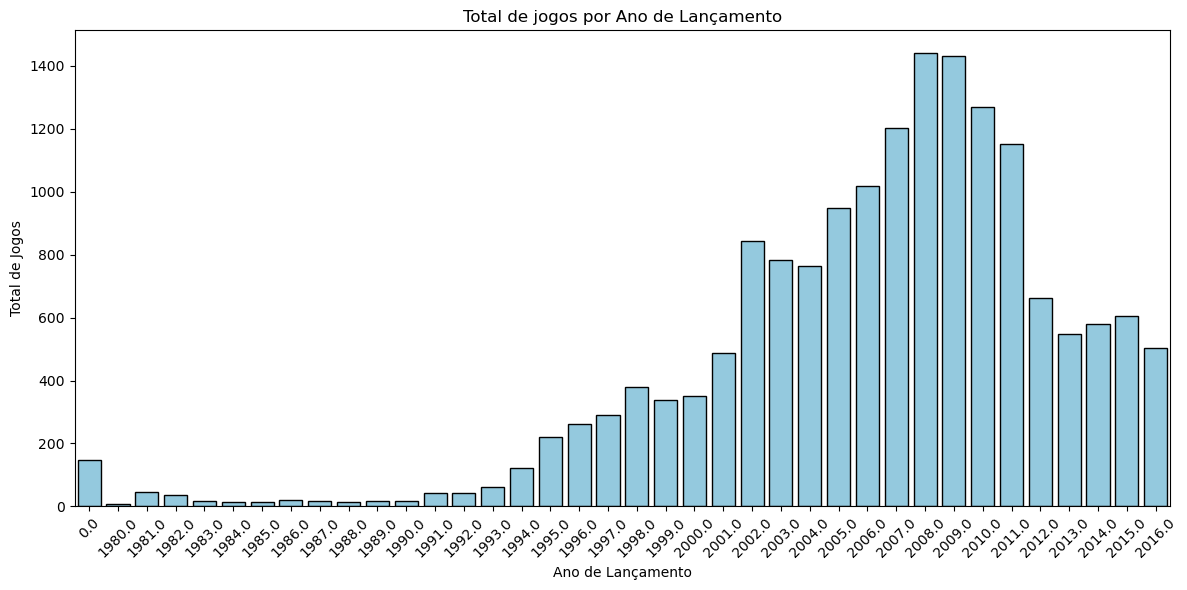

In [76]:
# Criando o gráfico
plt.figure(figsize=(12, 6))
sns.barplot(data=games_for_year, x='year_of_release', y='name', color='skyblue', edgecolor='black')

# Títulos e rótulos
plt.title('Total de jogos por Ano de Lançamento')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Total de Jogos')
plt.xticks(rotation=45)  # Rotaciona os anos para facilitar a leitura
plt.tight_layout()
plt.show()

Nota-se que desde a década de 90 o número de jogos aumentaram significativamente.

#### Veja como as vendas variaram de plataforma para plataforma. Escolha as plataformas com as maiores vendas totais e construa uma distribuição com base nos dados para cada ano.

In [77]:
# Agrupa a coluna 'platform' e soma o total de vendas para cada uma
#Ordena de ordem crescente e seleciona os 5 mais vendidos
platform_sales = df_ice.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platform_sales_top5 = platform_sales.head(5)
platform_sales_top5

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
Name: total_sales, dtype: float64

In [78]:
# Cria uma lista das 10 plataformas mais vendidas
top5_platforms = platform_sales_top5.index.tolist()
top5_platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS']

In [79]:
# Seeciona no df principal apenas as linhas onde há top5_platforms
df_ice_5 = df_ice[df_ice['platform'].isin(top5_platforms)]
df_ice_5 = df_ice_5.reset_index(drop=True)
df_ice_5

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
2,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
3,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
4,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
8220,Mezase!! Tsuri Master DS,DS,2009.0,Sports,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
8221,Plushees,DS,2008.0,Simulation,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01
8222,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.00,NaN,NaN,Unknown,0.00
8223,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01


In [80]:
#Agrupando o total de vendas para cada tipo de plataforma
df_ice_5_bar = df_ice_5.groupby('platform')['total_sales'].sum().reset_index()
df_ice_5_bar = df_ice_5_bar.sort_values(by='total_sales', ascending=False)
df_ice_5_bar 

,platform,total_sales
1,PS2,1255.77
4,X360,971.42
2,PS3,939.65
3,Wii,907.51
0,DS,806.12


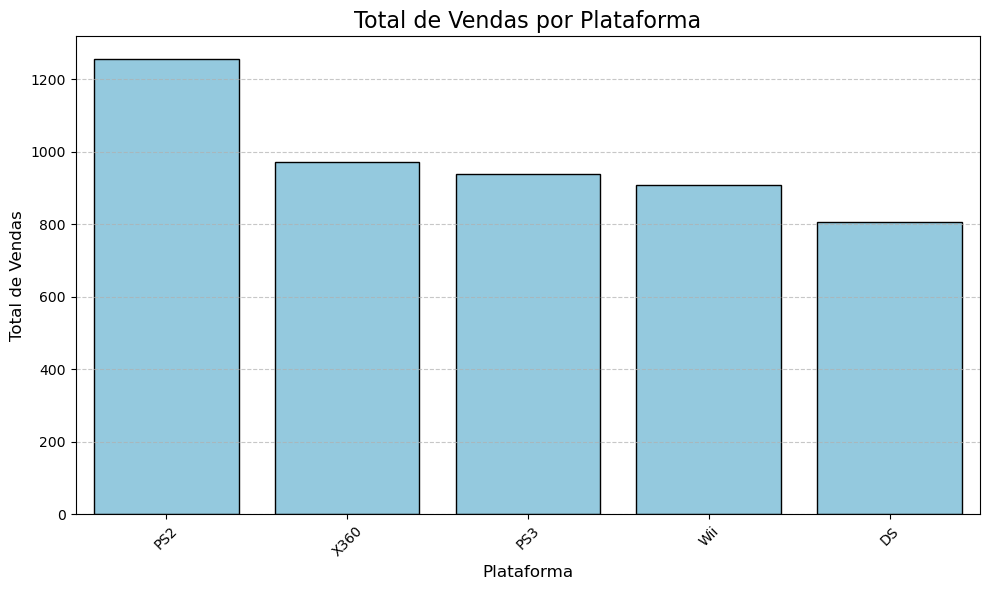

In [81]:
# Criação gráfico de barras 

plt.figure(figsize=(10,6))
sns.barplot(data=df_ice_5_bar, x='platform', y='total_sales', color = 'skyblue', edgecolor='black') 
plt.title('Total de Vendas por Plataforma', fontsize=16)
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Total de Vendas', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar o gráfico
plt.tight_layout()
plt.show()

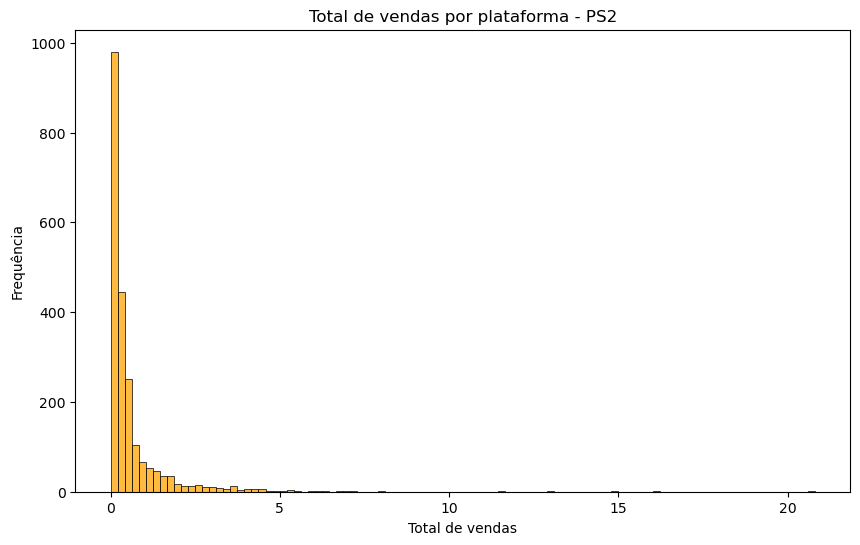

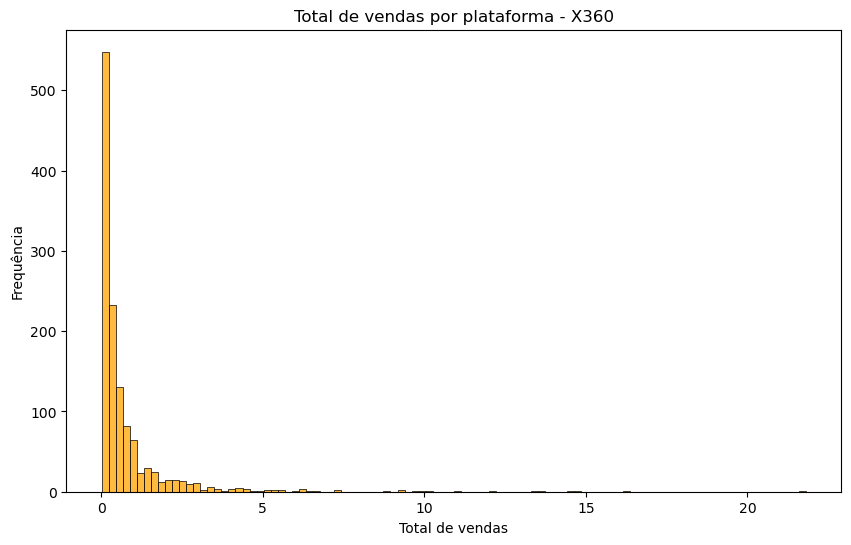

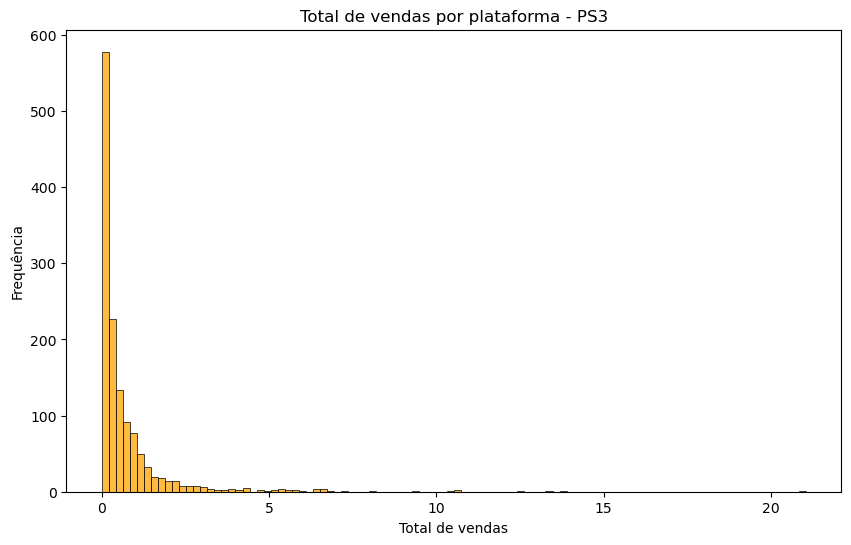

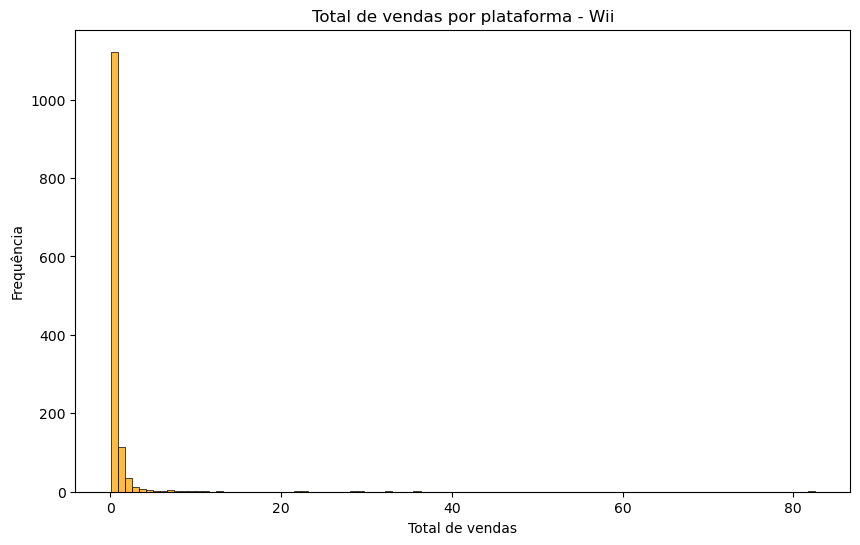

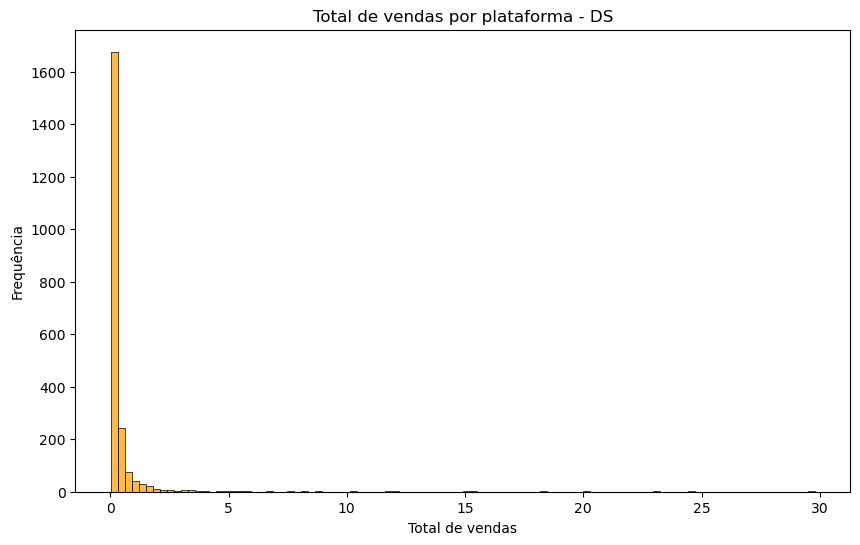

In [82]:
#Criação do histograma para cada plataforma

for platform in top5_platforms:
    plt.figure(figsize=(10,6))
    sns.histplot(data = df_ice_5[df_ice_5['platform']==platform], x='total_sales', bins=100, color='orange')
    plt.title(f'Total de vendas por plataforma - {platform}')
    plt.xlabel('Total de vendas')
    plt.ylabel('Frequência')
    plt.show()

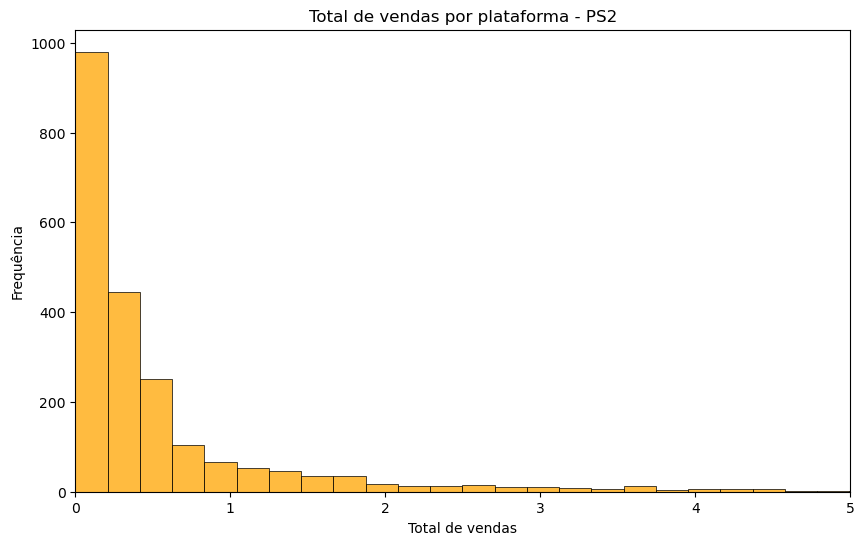

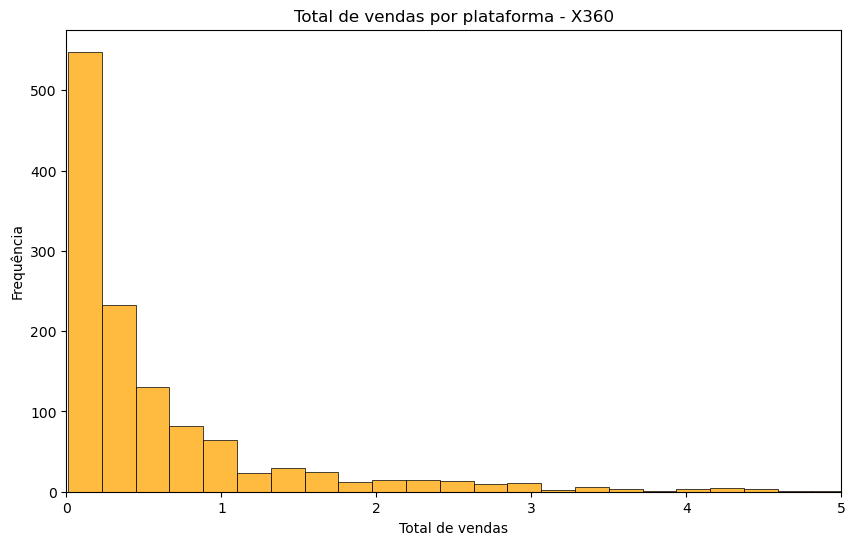

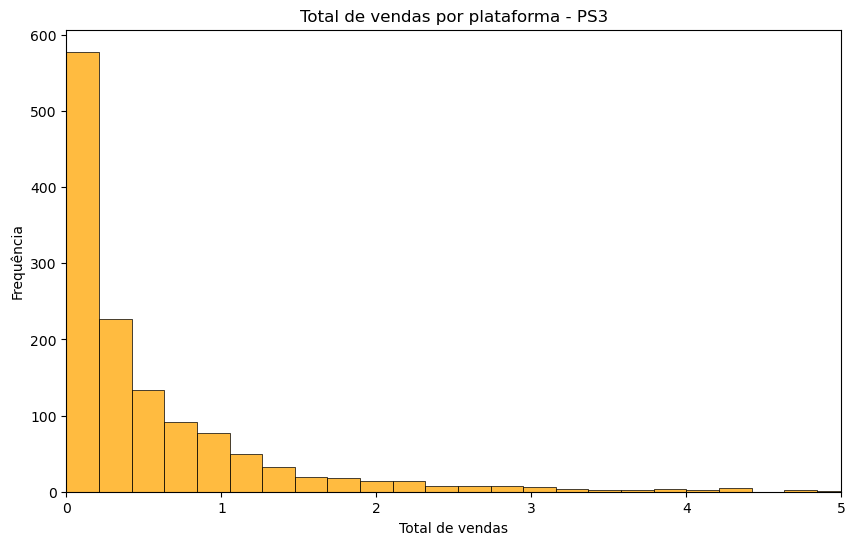

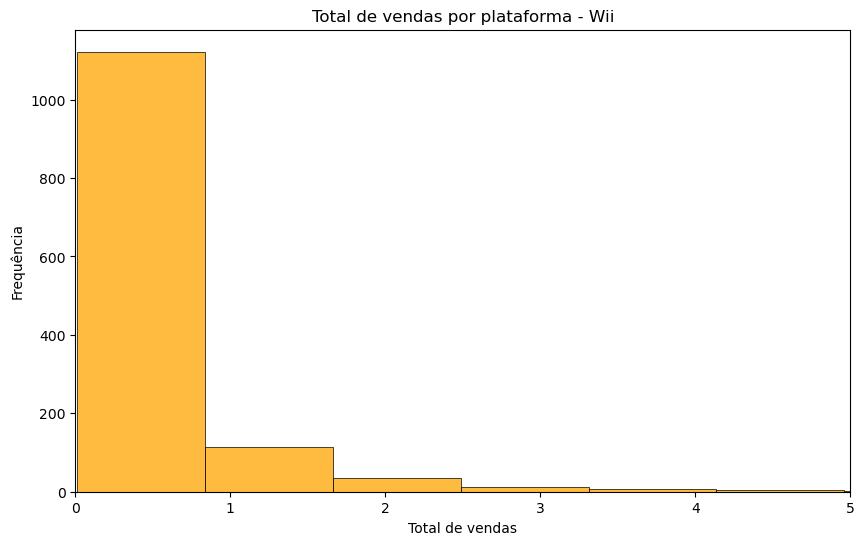

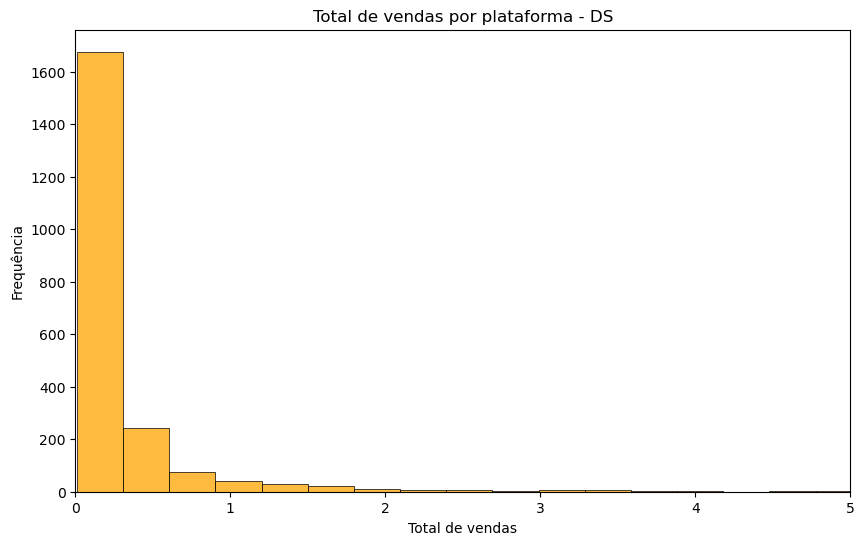

In [83]:
for platform in top5_platforms:
    plt.figure(figsize=(10,6))
    sns.histplot(data = df_ice_5[df_ice_5['platform']==platform], x='total_sales', bins=100, color='orange')
    plt.title(f'Total de vendas por plataforma - {platform}')
    plt.xlabel('Total de vendas')
    plt.ylabel('Frequência')
    plt.xlim(0,5)
    plt.show()

Observa-se que a maioria das plataformas teve muitos jogos com baixas vendas. Apenas alguns títulos se destacaram, alcançando mais de 3 milhões de unidades vendidas.

In [84]:
# Tempo de vida das plataformas
# Seleciona apenas as plataformas com ano de lançamento > 0

platforms_life_minmax = df_ice[df_ice['year_of_release'] > 0]
platforms_life_minmax = platforms_life_minmax.groupby('platform')['year_of_release'].agg(['min', 'max'])

# Calcula o tempo de vida útil de cada plataforma
platforms_life_minmax['lifespan'] = platforms_life_minmax['max'] - platforms_life_minmax['min']
platforms_life_minmax.reset_index().sort_values(by='min', ascending=True)

,platform,min,max,lifespan
0,2600,1980.0,1994.0,14.0
11,NES,1983.0,1994.0,11.0
4,DS,1985.0,2013.0,28.0
13,PC,1985.0,2016.0,31.0
5,GB,1988.0,2001.0,13.0
23,SNES,1990.0,1999.0,9.0
8,GEN,1990.0,1994.0,4.0
9,GG,1992.0,1992.0,0.0
22,SCD,1993.0,1994.0,1.0
12,NG,1993.0,1996.0,3.0


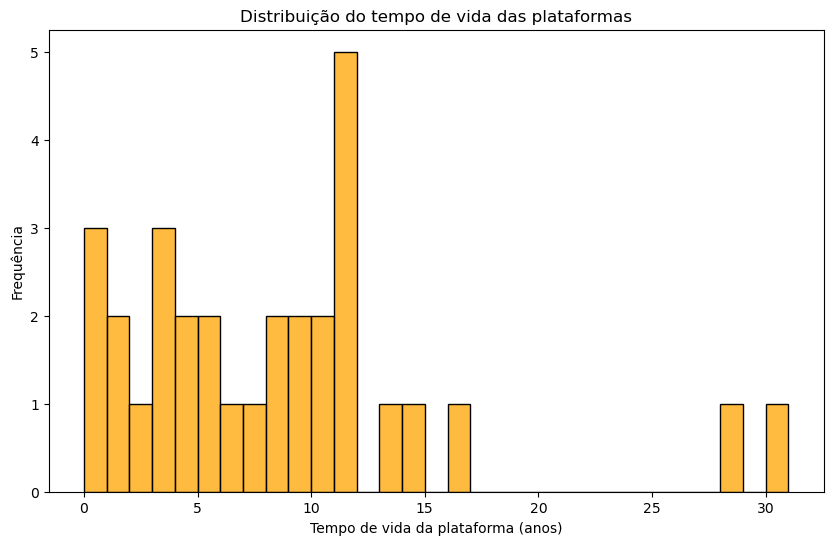

In [85]:
plt.figure(figsize=(10,6))
sns.histplot(data=platforms_life_minmax, x='lifespan', bins=31, color='orange')
plt.title('Distribuição do tempo de vida das plataformas')  
plt.xlabel('Tempo de vida da plataforma (anos)')
plt.ylabel('Frequência')
plt.show()

No histograma acima podemos observar que a maioria das plataformas tiveram um tempo de vida curto, especialmente entre 0 e 6 anos, mas algumas chegam até 12 anos de vida. Poucas plataformas duraram mais que 15 anos. 

Isso indica que é comum que as plataformas sejam descontinuadas em menos de uma década. Plataformas que sobrevivem mais de 15–20 anos são exceções, possivelmente grandes sucessos de mercado ou com muitos relançamentos.

O fato do tempo de vida ser curto, sugere que o mercado de consoles é altamente competitivo e sujeito a mudanças rápidas, com tecnologias sendo substituídas frequentemente.

Como o tempo de vida útil das plataformas variam em média 6 anos, usaremos apenas os dados com data de lançamento após 2011. Assim, teremos dados dentro do tempo de vida útil e que ainda estão no mercado. 

In [86]:
# Filtrando as plataformas com ano de lançamento após 2011

filtered_ice = df_ice[df_ice['year_of_release'] > 2011]
filtered_ice.reset_index()


,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Unknown,14.63
3,33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,Unknown,14.60
4,34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2894,16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
2895,16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
2896,16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
2897,16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01


#### Quais plataformas estão liderando em vendas? Quais estão crescendo ou diminuindo? Selecione várias plataformas potencialmente lucrativas.

In [87]:
# Seleciona as 5 plataformas com maior número de vendas 
filtered_ice_top5 = filtered_ice.groupby('platform')['total_sales'].sum().nlargest(5)
filtered_ice_top5

platform
PS4     314.14
PS3     289.71
X360    237.52
3DS     195.01
XOne    159.32
Name: total_sales, dtype: float64

As 5 plataformas que possuem o maior número de vendas são PS4, PS3, X360, 3DS e XOne. 

In [88]:
# Cria uma lista dos nomes das plataformas 
filtered_ice_top5 = filtered_ice_top5.index.tolist()
filtered_ice_top5 

['PS4', 'PS3', 'X360', '3DS', 'XOne']

In [89]:
# Filtra no df orifinar apenas as linhas que contém os nomes das plataformas na lista filtered_ice_top5
filtered_ice = filtered_ice[filtered_ice['platform'].isin(filtered_ice_top5)]
filtered_ice.reset_index()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Unknown,14.63
3,33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,Unknown,14.60
4,34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1819,16672,Metal Gear Solid V: The Definitive Experience,XOne,2016.0,Action,0.01,0.00,0.00,0.00,NaN,NaN,M,0.01
1820,16674,Tsukigime Ranko's Longest Day,PS3,2014.0,Action,0.00,0.01,0.00,0.00,NaN,NaN,Unknown,0.01
1821,16677,Aikatsu Stars! My Special Appeal,3DS,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
1822,16691,Dynasty Warriors: Eiketsuden,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01


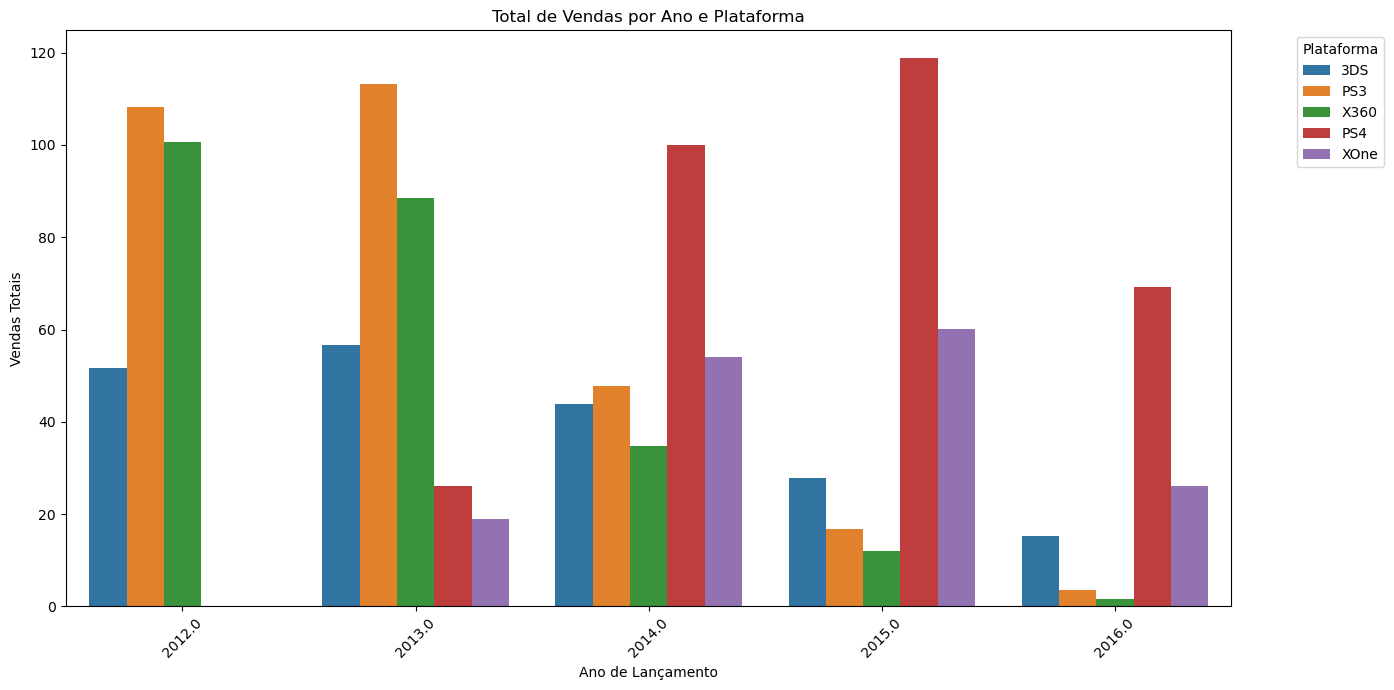

In [90]:
# Cria um novo df agrupando as colunas platform e year_of_release e soma o total de vendas em cada ano
sales_by_year_platform = (
    filtered_ice.groupby(['year_of_release', 'platform'])['total_sales']
    .sum()
    .reset_index())

# Criando o gráfico
plt.figure(figsize=(14, 7))
sns.barplot(
    data=sales_by_year_platform,
    x='year_of_release',
    y='total_sales',
    hue='platform'
)

plt.title('Total de Vendas por Ano e Plataforma')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Vendas Totais')
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Podemos observar que a plataforma X360 apresenta uma tendência de saída do mercado, uma vez que suas vendas vêm caindo de forma acentuada ano após ano. O mesmo padrão é observado nas plataformas PS3 e 3DS, que também registram quedas consistentes nas vendas ao longo do tempo.

Por outro lado, as plataformas PS4 e XOne demonstram um crescimento a partir de 2013, atingindo um pico de vendas em 2015. No entanto, já em 2016, nota-se uma queda significativa no desempenho de vendas dessas plataformas.

#### Construa um diagrama de caixa para as vendas globais de todos os jogos, divididos por plataforma. As diferenças nas vendas são significativas? E quanto às vendas médias em várias plataformas? Descreva suas descobertas.

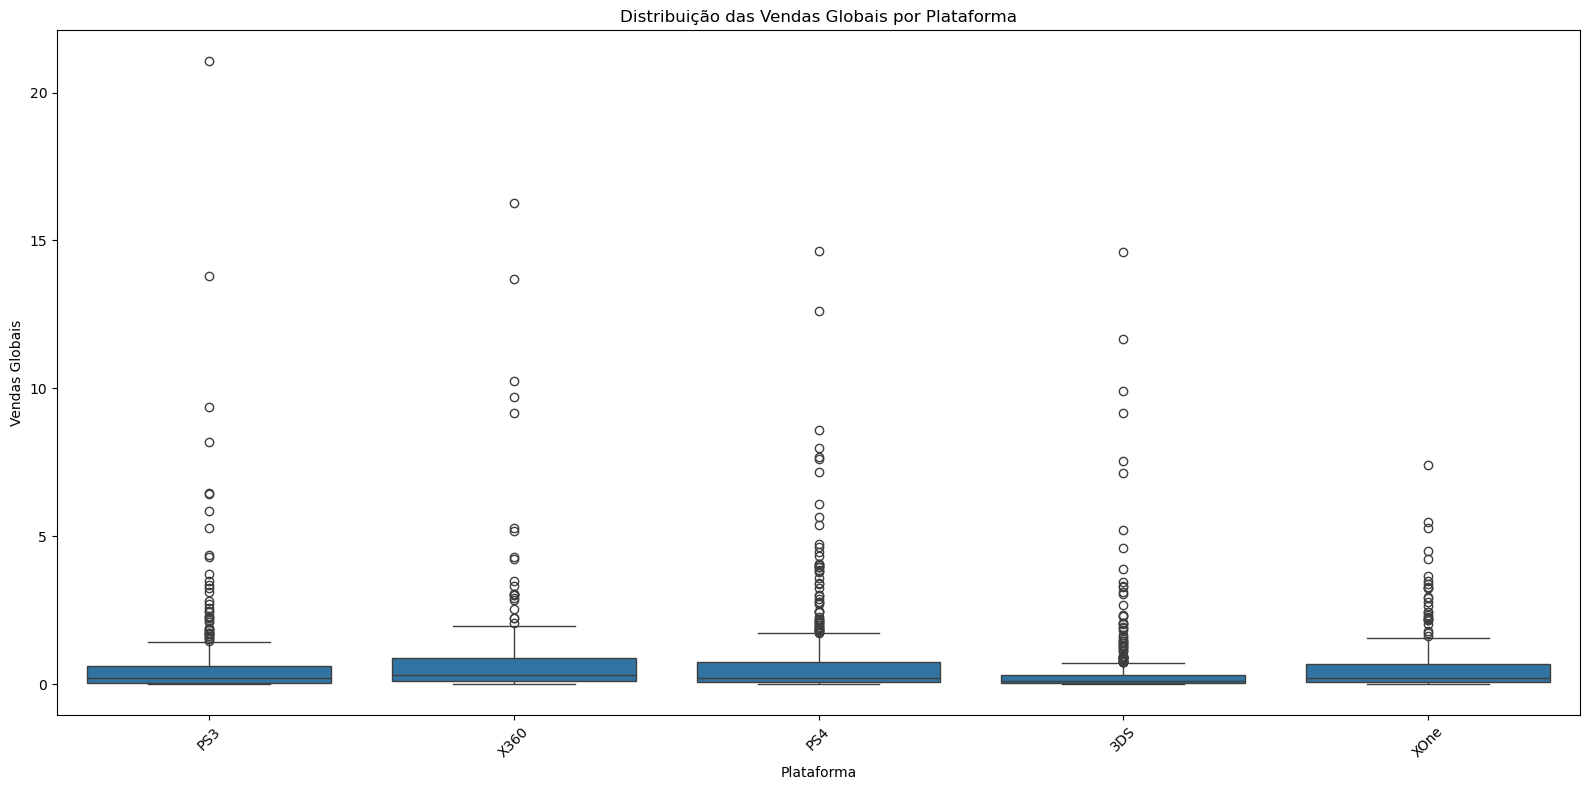

In [91]:
# Criando o diagrama de caixa 

plt.figure(figsize=(16, 8))
sns.boxplot(data=filtered_ice, x='platform', y='total_sales')

plt.title('Distribuição das Vendas Globais por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Vendas Globais')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Nota-se que todas as plataformas tiveram a maior parte dos jogos com vendas inferiores a 1 milhão de unidades. A mediada das vendas também é quase igual para todas as plataformas, abaixo de 1. 

Todas as plataformas tiverem suas exceções, com vendas superiores a 10 milhões. Embora sejam minoria, esses jogos representam os grandes sucessos de vendas.

Em geral, as vendas de jogos seguem uma distribuição assimétrica, com poucos jogos vendendo muito e a maioria vendendo pouco.

#### Veja como as avaliações de usuários e profissionais afetam as vendas de uma das plataformas populares (você escolhe). Construa um gráfico de dispersão e calcule a correlação entre avaliações e vendas.

##### Correlação Avaliações e Vendas PS4

In [92]:
# Filtra apenas a plataforma PS4 
filtered_ps4 = filtered_ice[filtered_ice['platform'] == 'PS4']
filtered_ps4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Unknown,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,Unknown,7.98
92,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16500,Root Letter,PS4,2016.0,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,Unknown,0.01
16503,Shin Hayarigami 2,PS4,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16526,Dungeons 2,PS4,2016.0,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
16530,Carmageddon: Max Damage,PS4,2016.0,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


In [93]:
# Faz o correlação entre critic_score e as vendas totais 
corr_ps4_critic_score = filtered_ps4['critic_score'].corr(filtered_ps4['total_sales'])
print(f'Correlação critic_score PS4: ', corr_ps4_critic_score)

# Faz o correlação entre user_score e as vendas totais 
corr_ps4_user_score = filtered_ps4['user_score'].corr(filtered_ps4['total_sales'])
print(f'Correlação user_score PS4: ', corr_ps4_user_score)

Correlação critic_score PS4:  0.40656790206178095
Correlação user_score PS4:  -0.031957110204556424


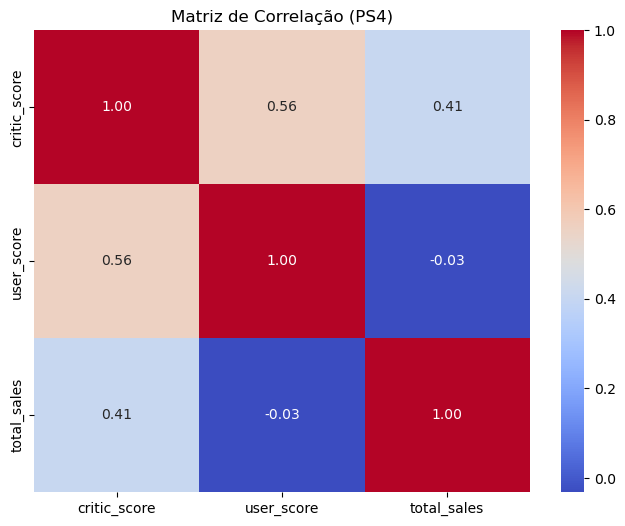

In [94]:
# Matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(filtered_ps4[['critic_score', 'user_score', 'total_sales']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação (PS4)')
plt.show()

**(Antes com o gráfico de dispersão)**
Observa-se que os jogos com as maiores avaliações, tanto de critic_score quanto de user_score, tendem a registrar volumes mais elevados de vendas. No entanto, é importante destacar que nem todos os títulos bem avaliados obtiveram desempenho expressivo em vendas. Curiosamente, alguns jogos com user_score inferior a 5 conseguiram alcançar entre 5 e 10 milhões de unidades vendidas, o que indica que outros fatores além das avaliações influenciam significativamente o sucesso comercial.

##### Correlação Avaliações vs Vendas: Xone 

In [95]:
# Selecionando apenas XOne 
filtered_xone = filtered_ice[filtered_ice['platform'] == 'XOne']
filtered_xone

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
99,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,Unknown,7.39
165,Grand Theft Auto V,XOne,2014.0,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014.0,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015.0,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015.0,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
...,...,...,...,...,...,...,...,...,...,...,...,...
16630,Sébastien Loeb Rally Evo,XOne,2016.0,Racing,0.00,0.01,0.00,0.00,63.0,8.2,E,0.01
16643,Rugby Challenge 3,XOne,2016.0,Sports,0.00,0.01,0.00,0.00,NaN,6.6,E,0.01
16645,ZombiU,XOne,2016.0,Action,0.00,0.01,0.00,0.00,NaN,NaN,Unknown,0.01
16660,Prison Architect,XOne,2016.0,Action,0.01,0.00,0.00,0.00,74.0,6.7,Unknown,0.01


In [96]:
# Faz o correlação entre critic_score e as vendas totais 
corr_xone_critic_score = filtered_xone['critic_score'].corr(filtered_xone['total_sales'])
print(f'Correlação critic_score XOne: ', corr_xone_critic_score)

# Faz o correlação entre user_score e as vendas totais 
corr_xone_user_score = filtered_xone['user_score'].corr(filtered_xone['total_sales'])
print(f'Correlação user_score XOne: ', corr_xone_user_score)

Correlação critic_score XOne:  0.4169983280084017
Correlação user_score XOne:  -0.06892505328279414


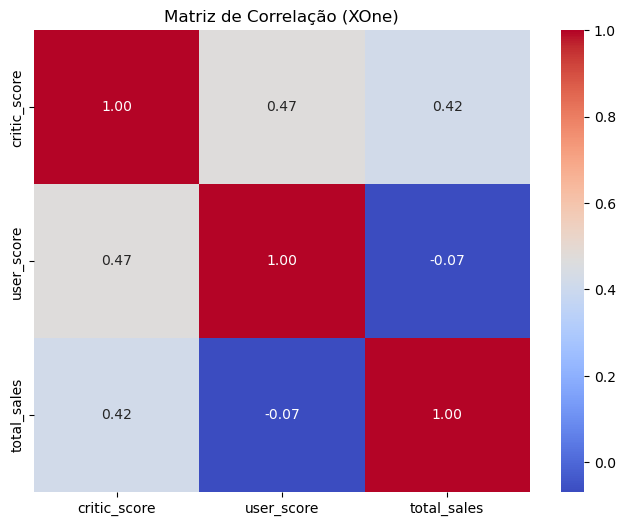

In [97]:
# Matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(filtered_xone[['critic_score', 'user_score', 'total_sales']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação (XOne)')
plt.show()

Ambas as análises acima podemos ver uma correlão negativa muito póroxima de zero para user_score e total de vendas. Isso indica que as notas de user_score não interferem muito nas vendas. Por outro lado o critic_score de aproximadamente 0.4 indica uma correlação modera. 
Podemos ver também que jogos vbem avaliados pelos críticos apresentam boa classificação dos usuários. 

#### Dê uma olhada na distribuição geral de jogos por gênero. O que podemos dizer sobre os gêneros mais lucrativos? Você pode generalizar sobre gêneros com vendas altas e baixas?

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10896\1197564989.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Gênero', bbox_to_anchor=(1.05, 1), loc='upper left')


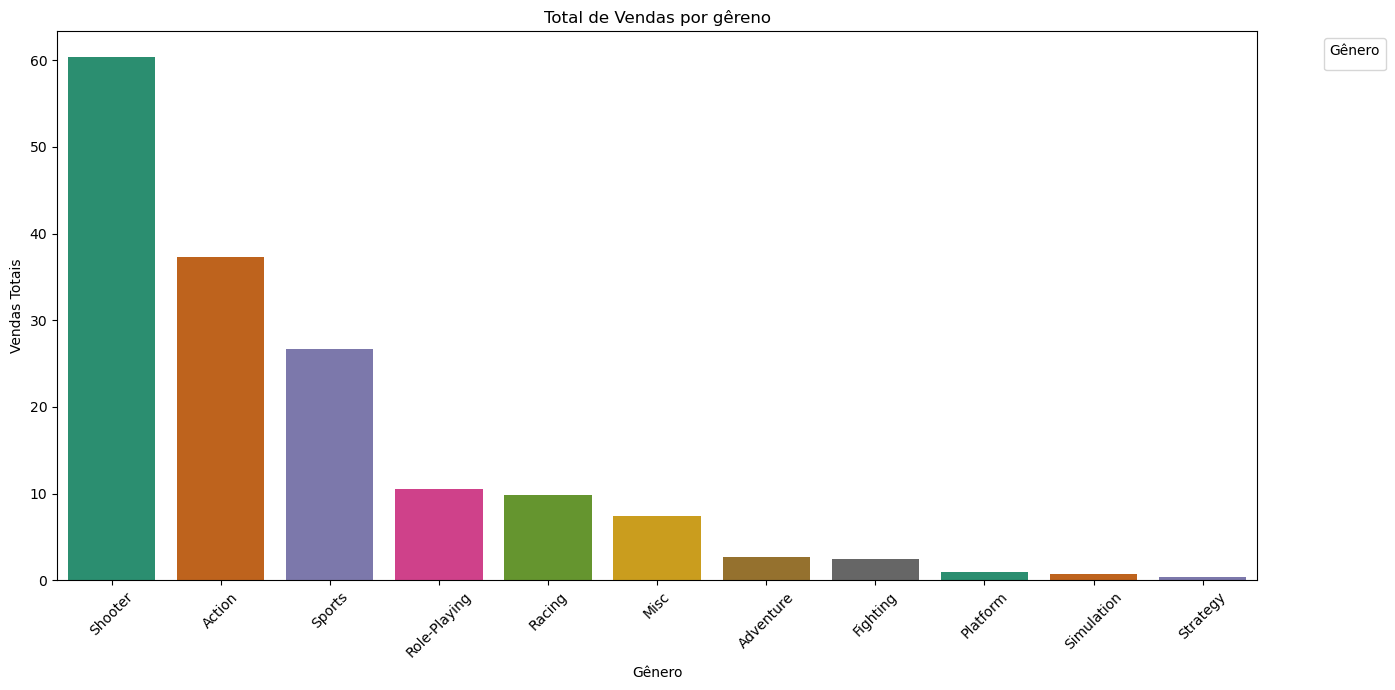

In [98]:
filtered_ps4 = filtered_ice[filtered_ice['platform'] == 'XOne']

sales_genre = (
    filtered_ps4.groupby('genre')['total_sales']
    .sum()
    .reset_index()
    .sort_values(by='total_sales',ascending=False)
)

# Criando o gráfico de barras

plt.figure(figsize=(14, 7))
sns.barplot(
    data=sales_genre,
    x='genre',
    y='total_sales',
    hue='genre',
    palette='Dark2',
)

plt.title('Total de Vendas por gêreno')
plt.xlabel('Gênero')
plt.ylabel('Vendas Totais')
plt.legend(title='Gênero', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

É possível observar que o gênero Shooter se destaca como o mais vendido, seguido por Action e Sports, todos com mais de 25 milhões de unidades vendidas. Na sequência, aparecem os gêneros Role-Playing, Racing e Misc, com vendas em torno de 10 milhões.

Por outro lado, os gêneros Adventure, Fighting, Platform, Simulation e Strategy registraram um desempenho mais modesto, com vendas inferiores a 5 milhões, indicando menor popularidade entre os consumidores.

### Etapa 4 - Para cada região (NA, EU, JP), determine:
#### As cinco plataformas principais. Descreva as variações das suas quotas de mercado de região para região.

In [99]:
# Seleciona apenas a região NA 
df_na = df_ice.drop(columns=["total_sales", "jp_sales", "eu_sales", "other_sales"])
#seleciona as 5 plataformas principais 
df_na_top5 = df_na.groupby('platform')['na_sales'].sum()
df_na_top5 = df_na_top5.reset_index().sort_values(by='na_sales', ascending=False).head(5)
df_na_top5

,platform,na_sales
28,X360,602.47
16,PS2,583.84
26,Wii,496.90
17,PS3,393.49
4,DS,382.40


In [100]:
# Calcula o total de vendas 
df_na_sales = df_na['na_sales'].sum()
print(f'Total de vendas na Amárica do Norte: ', df_na_sales)

Total de vendas na Amárica do Norte:  4400.570000000001


In [101]:
# Seleciona apenas a região UE
df_eu = df_ice.drop(columns=["total_sales", "jp_sales", "na_sales", "other_sales"])
#seleciona as 5 plataformas principais 
df_eu_top5 = df_eu.groupby('platform')['eu_sales'].sum()
df_eu_top5 = df_eu_top5.reset_index().sort_values(by='eu_sales', ascending=False).head(5)
df_eu_top5

,platform,eu_sales
16,PS2,339.29
17,PS3,330.29
28,X360,270.76
26,Wii,262.21
15,PS,213.61


In [102]:
#Calcula o total de vendas 
df_eu_sales = df_eu['eu_sales'].sum()
print(f'Total de vendas na Europa: ', df_eu_sales)

Total de vendas na Europa:  2424.1400000000003


In [103]:
# Seleciona apenas a região JP
df_jp = df_ice.drop(columns=["total_sales", "eu_sales", "na_sales", "other_sales"])
#seleciona as 5 plataformas principais JP
df_jp_top5 = df_jp.groupby('platform')['jp_sales'].sum()
df_jp_top5 = df_jp_top5.reset_index().sort_values(by='jp_sales', ascending=False).head(5)
df_jp_top5

,platform,jp_sales
4,DS,175.57
15,PS,139.82
16,PS2,139.20
23,SNES,116.55
2,3DS,100.67


In [104]:
# Calcula o total de vendas 
df_jp_sales = df_jp['jp_sales'].sum()
print(f'Total de vendas no Japão: ', df_jp_sales)

Total de vendas no Japão:  1297.34


In [105]:
df_merge = df_na_top5.merge(df_eu_top5, on='platform', how='outer')
df_merge = df_merge.merge(df_jp_top5, on='platform', how='outer')
df_merge 

,platform,na_sales,eu_sales,jp_sales
0,3DS,NaN,NaN,100.67
1,DS,382.40,NaN,175.57
2,PS,NaN,213.61,139.82
3,PS2,583.84,339.29,139.20
4,PS3,393.49,330.29,NaN
5,SNES,NaN,NaN,116.55
6,Wii,496.90,262.21,NaN
7,X360,602.47,270.76,NaN


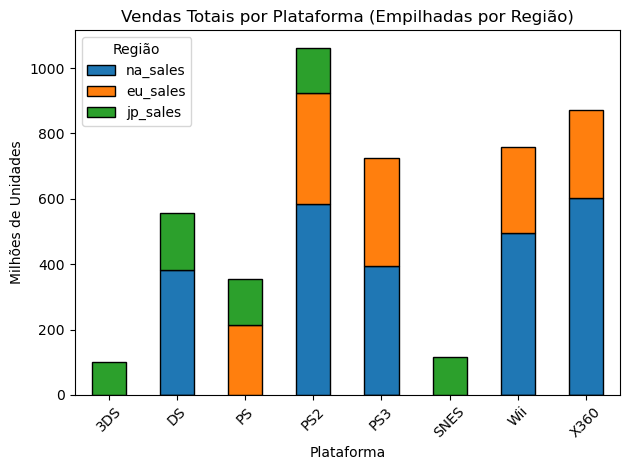

In [106]:
# Criando o gráfico
df_merge.set_index('platform')[['na_sales', 'eu_sales', 'jp_sales']].plot(
    kind='bar',
    stacked=True,
    edgecolor='black'
)

plt.title('Vendas Totais por Plataforma (Empilhadas por Região)')
plt.ylabel('Milhões de Unidades')
plt.xlabel('Plataforma')
plt.xticks(rotation=45)
plt.legend(title='Região')
plt.tight_layout()
plt.show()

Podemos observar uma grande diferença na preferência por plataformas entre as três regiões. Um dado interessante é que a plataforma PS2 é a única presente no Top 5 de todas as regiões — ocupando o 1º lugar na Europa, 2º na América do Norte e 3º no Japão.

As plataformas SNES e 3DS aparecem no Top 5 exclusivamente no Japão, enquanto X360, Wii e PS3 estão entre as mais vendidas apenas na Europa e América do Norte. Já a plataforma PS1 aparece no Top 5 na Europa e no Japão, mas não na América do Norte.

Além disso, nota-se que a América do Norte é a região que mais contribuiu para as vendas em 5 das plataformas selecionadas no Top 5.

#### Os cinco principais gêneros. Explique a diferença.

In [107]:
# Seleciona os 5 principais gêneros NA
na_top5_genre = df_na.groupby('genre')['na_sales'].sum()
na_top5_genre = na_top5_genre.reset_index().sort_values(by='na_sales', ascending=False).head(5)
na_top5_genre 

,genre,na_sales
0,Action,879.01
10,Sports,684.43
8,Shooter,592.24
4,Platform,445.50
3,Misc,407.27


In [108]:
# Seleciona os 5 principais gêneros EU
eu_top5_genre = df_eu.groupby('genre')['eu_sales'].sum()
eu_top5_genre = eu_top5_genre.reset_index().sort_values(by='eu_sales', ascending=False).head(5)
eu_top5_genre 

,genre,eu_sales
0,Action,519.13
10,Sports,376.79
8,Shooter,317.34
6,Racing,236.51
3,Misc,212.74


In [109]:
# Seleciona os 5 principais gêneros JP
jp_top5_genre = df_jp.groupby('genre')['jp_sales'].sum()
jp_top5_genre = jp_top5_genre.reset_index().sort_values(by='jp_sales', ascending=False).head(5)
jp_top5_genre 

,genre,jp_sales
7,Role-Playing,355.41
0,Action,161.43
10,Sports,135.54
4,Platform,130.83
3,Misc,108.11


In [110]:
df_merge_genre = na_top5_genre.merge(eu_top5_genre, on='genre', how='outer')
df_merge_genre = df_merge_genre.merge(jp_top5_genre, on='genre', how='outer')
df_merge_genre 

,genre,na_sales,eu_sales,jp_sales
0,Action,879.01,519.13,161.43
1,Misc,407.27,212.74,108.11
2,Platform,445.50,NaN,130.83
3,Racing,NaN,236.51,NaN
4,Role-Playing,NaN,NaN,355.41
5,Shooter,592.24,317.34,NaN
6,Sports,684.43,376.79,135.54


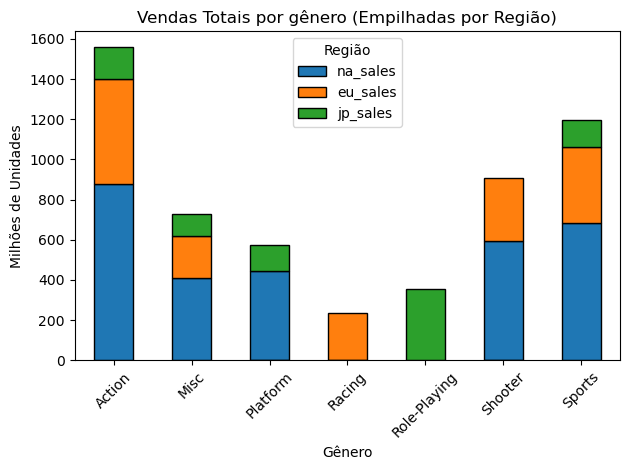

In [111]:
# Criando o gráfico
df_merge_genre.set_index('genre')[['na_sales', 'eu_sales', 'jp_sales']].plot(
    kind='bar',
    stacked=True,
    edgecolor='black'
)

plt.title('Vendas Totais por gênero (Empilhadas por Região)')
plt.ylabel('Milhões de Unidades')
plt.xlabel('Gênero')
plt.xticks(rotation=45)
plt.legend(title='Região')
plt.tight_layout()
plt.show()

Nas três regiões analisadas, observa-se a predominância de sete gêneros de jogos: Action, Sports, Shooter, Platform, Misc, Racing e Role-Playing.
O gênero com maior volume de vendas no total é o Action.

Os gêneros Action, Sports e Misc apresentam boa aceitação em todas as regiões, embora o Japão registre os menores índices de vendas nesses três segmentos.

O gênero Shooter aparece entre os cinco mais vendidos apenas na América do Norte e Europa, enquanto o gênero Platform se destaca apenas na América do Norte e no Japão.

Já o gênero Racing figura entre os favoritos exclusivamente na Europa, e o Role-Playing tem destaque apenas no Japão.

#### As classificações do ESRB afetam as vendas em regiões individuais?

In [112]:
# Classificação ESRB NA
esrb_na = df_na.groupby('rating')['na_sales'].sum()
esrb_na = esrb_na.reset_index().sort_values(by='na_sales', ascending=False)
esrb_na

,rating,na_sales
1,E,1292.99
8,Unknown,1240.68
7,T,759.75
5,M,748.48
2,E10+,353.32
4,K-A,2.56
3,EC,1.53
0,AO,1.26
6,RP,0.00


In [113]:
# Classificação ESRB EU
esrb_eu = df_eu.groupby('rating')['eu_sales'].sum()
esrb_eu = esrb_eu.reset_index().sort_values(by='eu_sales', ascending=False)
esrb_eu

,rating,eu_sales
1,E,710.25
8,Unknown,613.30
5,M,483.97
7,T,427.03
2,E10+,188.52
0,AO,0.61
4,K-A,0.27
3,EC,0.11
6,RP,0.08


In [114]:
# Classificação ESRB JP
esrb_jp = df_jp.groupby('rating')['jp_sales'].sum()
esrb_jp = esrb_jp.reset_index().sort_values(by='jp_sales', ascending=False)
esrb_jp

,rating,jp_sales
8,Unknown,841.93
1,E,198.11
7,T,151.40
5,M,64.24
2,E10+,40.20
4,K-A,1.46
0,AO,0.00
3,EC,0.00
6,RP,0.00


In [115]:
# Unindo em um só DF
esrb_merge = esrb_na.merge(esrb_eu, on='rating', how='outer')
esrb_merge = esrb_merge.merge(esrb_jp, on='rating', how='outer')
esrb_merge

,rating,na_sales,eu_sales,jp_sales
0,AO,1.26,0.61,0.00
1,E,1292.99,710.25,198.11
2,E10+,353.32,188.52,40.20
3,EC,1.53,0.11,0.00
4,K-A,2.56,0.27,1.46
5,M,748.48,483.97,64.24
6,RP,0.00,0.08,0.00
7,T,759.75,427.03,151.40
8,Unknown,1240.68,613.30,841.93


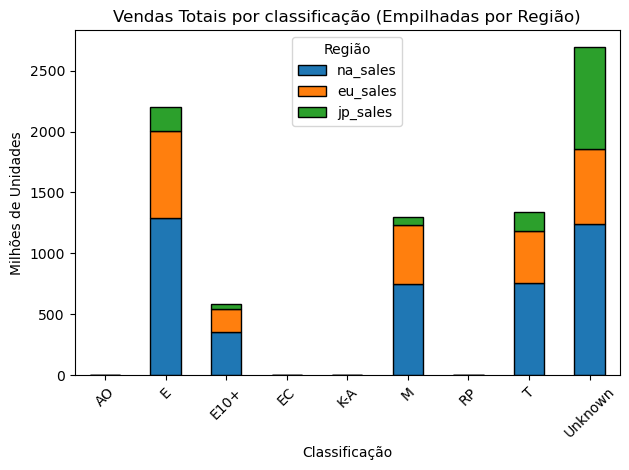

In [116]:
esrb_merge.set_index('rating')[['na_sales', 'eu_sales', 'jp_sales']].plot(
    kind='bar',
    stacked=True,
    edgecolor='black'
)

plt.title('Vendas Totais por classificação (Empilhadas por Região)')
plt.ylabel('Milhões de Unidades')
plt.xlabel('Classificação')
plt.xticks(rotation=45)
plt.legend(title='Região')
plt.tight_layout()
plt.show()

Podemos observar que a classificação etária influencia nas vendas de jogos. A categoria "Desconhecida" registrou o maior volume de vendas totais, possivelmente devido à ausência de dados ou títulos mais antigos sem classificação formal.

Em seguida, a classificação E (Everyone – a partir de 6 anos) aparece como a segunda mais vendida, seguida por T (Teen – a partir de 13 anos), M (Mature – a partir de 17 anos) e E10+ (Everyone 10 and older – a partir de 10 anos).

As demais classificações, como K-A, EC, AO e RP, não apresentaram volumes de vendas significativos.

## Etapa 5. Teste as seguintes hipóteses:

#### As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.

In [117]:
# Classificação média dos usuários Xbox
df_xone = df_ice[df_ice['platform'] == 'XOne']
df_xone = df_xone['user_score']

In [118]:
# Classificação média dos usuários PC
df_pc = df_ice[df_ice['platform'] == 'PC']
df_pc = df_pc['user_score']

In [119]:
# H0: As classificações médias dos usuários das plataformas XOne e PC são iguais
# H1: As classificações médias dos usuários das plataformas XOne e PC são diferentes

sample_pc = df_pc.dropna() #Elimina os valores ausentes NaN's
sample_xone = df_xone.dropna() #Elimina os valores ausentes NaN's

alpha = 0.05 
if sample_pc.var() == sample_xone.var():
    results = st.ttest_ind(sample_pc, sample_xone, equal_var=True)
else:
    results = st.ttest_ind(sample_pc, sample_xone, equal_var=False)
    

print('valor-p: ', results.pvalue)

if (results.pvalue < alpha):
    print("Rejeitamos a hipótese nula")
else:
    print("Não podemos rejeitar a hipótese nula")

valor-p:  4.935072360183574e-06
Rejeitamos a hipótese nula


#### As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.

In [120]:
# Filtrando o gênero Action 
df_action = df_ice[df_ice['genre']=='Action']
df_action = df_action['user_score']

df_action_mean = df_action.mean()
print(f'Classificação média de usuários para o gêneo Ation: ', df_action_mean) 

Classificação média de usuários para o gêneo Ation:  7.054043715846995


In [121]:
# Filtrando o gênero Sports
df_sports = df_ice[df_ice['genre']=='Sports']
df_sports = df_sports['user_score']

df_sports_mean = df_sports.mean()
print(f'Classificação média de usuários para o gêneo Sports: ', df_sports_mean) 



Classificação média de usuários para o gêneo Sports:  6.96119673617407


In [122]:
# H0: As classificações médias dos usuários para os gêneros Action e Sports são iguais
# H1: As classificações médias dos usuários para os gêneros Action e Sports são diferentes

sample_action = df_action.dropna() #Elimina os valores ausentes NaN's
sample_sports = df_sports.dropna() #Elimina os valores ausentes NaN's

alpha = 0.05 
if sample_action.var() != sample_sports.var():
    results = st.ttest_ind(sample_action, sample_sports, equal_var=True)
else:
    results = st.ttest_ind(sample_action, sample_sports, equal_var=False)
    

print('valor-p: ', results.pvalue)

if (results.pvalue < alpha):
    print("Rejeitamos a hipótese nula")
else:
    print("Não podemos rejeitar a hipótese nula")

valor-p:  0.10406951359049141
Não podemos rejeitar a hipótese nula


Para ambos os testes de hipótese foi utilizada uma análise bicaudal, já que a hipótese alternativa considera qualquer diferença nas médias, seja para mais ou para menos — não apenas quando uma média é maior que a outra.

No teste sobre a classificação média dos usuários por plataforma, o resultado indicou que podemos rejeitar a hipótese nula, pois o valor-p foi superior ao nível de significância adotado. Isso sugere que existe uma diferença estatisticamente significativa entre as médias.

Já no teste sobre a classificação média dos usuários por gênero, o valor-p foi inferior ao nível de significância, o que indica que não podemos rejeitar a hipótese nula. Mesmo que as médias não sejam exatamente iguais, a diferença observada não é estatisticamente significativa, podendo ser apenas fruto do acaso.

O nível de significância adotado foi de 5% (0,05), um padrão amplamente utilizado em testes estatísticos. Ele representa uma margem de erro aceitável para decidir se as diferenças observadas são ou não relevantes do ponto de vista estatístico.

### Conclusão geral 

A base de dados exigiu algumas tratativas iniciais para garantir a qualidade das análises. Foi necessário ajustar o tipo de dados de cada coluna para evitar erros futuros, padronizar os nomes das colunas — removendo letras maiúsculas — e tratar os valores ausentes, assegurando resultados mais consistentes.

No ranking total de vendas, a América do Norte lidera com folga, seguida pela Europa, Japão e outras regiões.

Em relação ao desenvolvimento de novos jogos, observa-se que, a partir da década de 1990, houve um crescimento significativo no número de lançamentos anuais.

De modo geral, as plataformas que mais se destacaram em vendas foram PS2, X360, PS3, Wii e DS. A maioria dessas plataformas teve um ciclo de vida curto, com duração entre 0 e 6 anos, embora algumas tenham alcançado até 12 anos. Poucas superaram os 15 anos de existência. Isso sugere que é comum as plataformas serem descontinuadas em menos de uma década. Aqueles sistemas que ultrapassam os 15 ou 20 anos representam exceções, geralmente associadas a grandes sucessos de mercado ou a diversos relançamentos.

O fato de a vida útil das plataformas ser relativamente curta indica que o mercado de consoles é altamente competitivo e sujeito a rápidas transformações, com novas tecnologias substituindo as anteriores com frequência.

Considerando que a vida útil média das plataformas é de cerca de 6 anos, optamos por utilizar apenas dados de lançamentos posteriores a 2011. Dessa forma, garantimos que os dados analisados ainda estejam dentro da janela de relevância comercial.

A partir disso, observamos que a plataforma X360 apresenta sinais claros de saída do mercado, com vendas em queda acentuada ano após ano. Esse mesmo comportamento é identificado nas plataformas PS3 e 3DS, que também registram reduções consistentes nas vendas ao longo do tempo.

Por outro lado, as plataformas PS4 e XOne demonstraram crescimento a partir de 2013, atingindo seu pico de vendas em 2015. Contudo, já em 2016, é perceptível uma queda significativa no desempenho dessas plataformas.

De modo geral, todas as plataformas apresentaram a maior parte de seus jogos com vendas inferiores a 1 milhão de unidades. As médias de vendas entre elas também são semelhantes, situando-se abaixo de 1 milhão.

Ainda assim, todas as plataformas tiveram seus destaques: jogos que ultrapassaram a marca de 10 milhões de unidades vendidas. Embora esses casos sejam minoria, representam os grandes sucessos de vendas e exercem forte impacto nos resultados gerais.

Em termos estatísticos, as vendas de jogos apresentam uma distribuição assimétrica: poucos títulos concentram a maior parte das vendas, enquanto a maioria registra números modestos.

**Avaliações**

Quanto às avaliações, observa-se que jogos com notas mais altas — tanto de critic_score quanto de user_score — tendem a alcançar volumes maiores de vendas. No entanto, nem todos os títulos bem avaliados obtêm desempenho expressivo. Curiosamente, alguns jogos com user_score inferior a 5 conseguiram vender entre 5 e 10 milhões de unidades, indicando que fatores além das avaliações influenciam significativamente o sucesso comercial.

Um padrão semelhante pode ser visto na plataforma XOne. A partir da análise, é possível inferir que o critic_score exerce maior influência sobre as vendas do que o user_score. Os jogos que ultrapassaram 5 milhões de unidades vendidas, em geral, apresentaram critic_scores acima de 70 pontos.

**Gêneros de jogos**

O gênero Shooter se destaca como o mais vendido, seguido por Action e Sports, todos com mais de 25 milhões de unidades comercializadas. Na sequência, estão Role-Playing, Racing e Misc, com cerca de 10 milhões de unidades vendidas cada.

Por outro lado, os gêneros Adventure, Fighting, Platform, Simulation e Strategy tiveram desempenho mais modesto, com vendas abaixo de 5 milhões de unidades — o que sugere menor popularidade entre os consumidores.

**Preferência por região**

Há uma diferença clara nas preferências por plataformas entre as regiões. Um dado interessante é que a PS2 é a única plataforma presente no Top 5 de todas as regiões — ocupando o 1º lugar na Europa, 2º na América do Norte e 3º no Japão.

As plataformas SNES e 3DS aparecem entre as mais vendidas exclusivamente no Japão, enquanto X360, Wii e PS3 figuram apenas no Top 5 da Europa e América do Norte. Já a PS1 aparece no Top 5 da Europa e Japão, mas não na América do Norte.

Além disso, observa-se que a América do Norte contribuiu com o maior volume de vendas em 5 das plataformas mais bem colocadas.

**Gêneros por região**

Nas três regiões analisadas, sete gêneros dominam o mercado: Action, Sports, Shooter, Platform, Misc, Racing e Role-Playing. Dentre esses, Action lidera em vendas totais.

Os gêneros Action, Sports e Misc são bem aceitos em todas as regiões, embora o Japão apresente menores volumes de vendas nesses segmentos.

O gênero Shooter aparece entre os cinco mais vendidos apenas na América do Norte e Europa, enquanto Platform se destaca apenas na América do Norte e no Japão. O gênero Racing figura entre os favoritos exclusivamente na Europa, enquanto Role-Playing ganha destaque apenas no Japão.

**Classificação etária**

A classificação etária também influencia nas vendas. A categoria "Desconhecida" lidera em volume total de vendas — possivelmente devido à ausência de dados ou à presença de títulos antigos não classificados formalmente.

Na sequência, estão as categorias E (Everyone – a partir de 6 anos), T (Teen – a partir de 13 anos), M (Mature – a partir de 17 anos) e E10+ (Everyone 10 and older – a partir de 10 anos).

As demais classificações, como K-A, EC, AO e RP, apresentaram volumes de vendas irrelevantes.

**Testes estatísticos**

Foram realizados dois testes de hipótese com análise bicaudal, uma vez que a hipótese alternativa considerava qualquer diferença entre as médias, seja positiva ou negativa.

No teste sobre a média de user_score por plataforma, o valor-p foi superior ao nível de significância adotado (5%), o que não permite rejeitar a hipótese nula. Isso sugere que não há diferença estatisticamente significativa entre as médias por plataforma.

Já no teste envolvendo as médias por gênero, o valor-p foi inferior ao nível de significância, o que permite rejeitar a hipótese nula, indicando que existe, sim, uma diferença estatisticamente significativa entre as médias de avaliação por gênero.

O nível de significância adotado foi de 5% (0,05), um padrão amplamente utilizado na estatística, representando uma margem de erro aceitável para julgar se as diferenças observadas são relevantes.